In [23]:
%matplotlib inline

In [24]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn import svm
import os
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [25]:
dataset_path = r"C:\Users\bianc\OneDrive\Desktop\Pets"
categories = ['cats', 'dogs']

In [26]:
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    if os.path.exists(folder_path):
        print(f"✅ Found folder: {folder_path}")
        print(f"📷 Sample files: {os.listdir(folder_path)[:5]}")
    else:
        print(f"❌ Folder not found: {folder_path}")


✅ Found folder: C:\Users\bianc\OneDrive\Desktop\Pets\cats
📷 Sample files: ['cat.10.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10007.jpg', 'cat.10017.jpg']
✅ Found folder: C:\Users\bianc\OneDrive\Desktop\Pets\dogs
📷 Sample files: ['dog.100.jpg', 'dog.10006.jpg', 'dog.10010.jpg', 'dog.10014.jpg', 'dog.10017.jpg']


In [27]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import os

flat_image_data = []
target_index = []
total_loaded = 0
total_skipped = 0

for index, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    # print(f"\n📂 Loading from: {folder_path}")

    # if not os.path.exists(folder_path):
    #     print(f"❌ Folder not found: {folder_path}")
    #     continue

    for img_file in os.listdir(folder_path)[:500]:
        if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue  # Skip non-image files

        try:
            img_path = os.path.join(folder_path, img_file)
            img = imread(img_path)


            img_resize = resize(img, (128, 128, 3), anti_aliasing=True)

            flat_image_data.append(img_resize.flatten())
            target_index.append(index)
            total_loaded += 1

            if total_loaded % 50 == 0:
                print(f"✅ Loaded {total_loaded} images...")

        except Exception as e:
            print(f"Skipped {img_file} due to error: {e}")
            total_skipped += 1
            continue

# print(f"\n🎉 Done loading!")
# print(f"📦 Total images loaded: {total_loaded}")
# print(f"🚫 Skipped due to errors: {total_skipped}")
print(f"🐱 Cats: {target_index.count(0)}")
print(f"🐶 Dogs: {target_index.count(1)}")

✅ Loaded 50 images...
✅ Loaded 100 images...
✅ Loaded 150 images...
✅ Loaded 200 images...
✅ Loaded 250 images...
✅ Loaded 300 images...
✅ Loaded 350 images...
✅ Loaded 400 images...
✅ Loaded 450 images...
✅ Loaded 500 images...
✅ Loaded 550 images...
✅ Loaded 600 images...
✅ Loaded 650 images...
✅ Loaded 700 images...
✅ Loaded 750 images...
✅ Loaded 800 images...
✅ Loaded 850 images...
✅ Loaded 900 images...
✅ Loaded 950 images...
✅ Loaded 1000 images...
🐱 Cats: 500
🐶 Dogs: 500


In [28]:
print("Total images loaded:", len(flat_image_data))
print("Cats:", target_index.count(0), "Dogs:", target_index.count(1))

Total images loaded: 1000
Cats: 500 Dogs: 500


In [29]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Train-test split
flat_image_data = np.array(flat_image_data)
target_index = np.array(target_index)
X_train, X_test, y_train, y_test = train_test_split(flat_image_data, target_index, test_size=0.2, random_state=0)

# Train model
model = svm.SVC(kernel="rbf")
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
# Metrics
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}","% accurate")
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=categories))

✅ Accuracy: 56.50 % accurate
📊 Classification Report:
               precision    recall  f1-score   support

        cats       0.56      0.54      0.55        98
        dogs       0.57      0.59      0.58       102

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



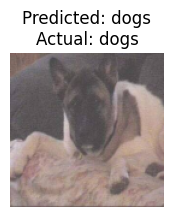

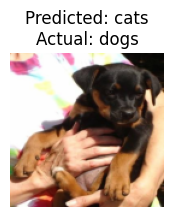

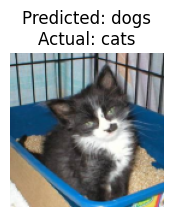

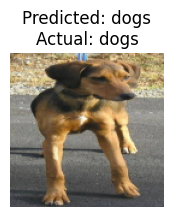

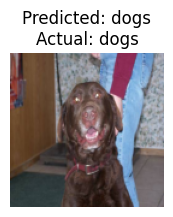

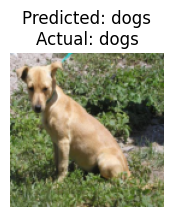

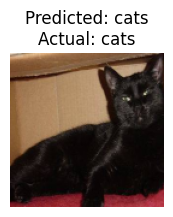

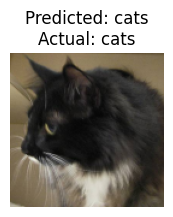

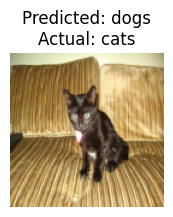

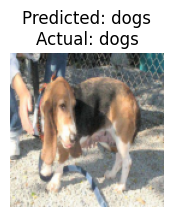

(49152,)


In [31]:
import matplotlib.pyplot as plt

for i in range(10):
    img = X_test[i].reshape(128, 128, 3)
    plt.figure(figsize=(8, 2))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {categories[y_pred[i]]}\nActual: {categories[y_test[i]]}")
    plt.show()
print(X_test[i].shape)

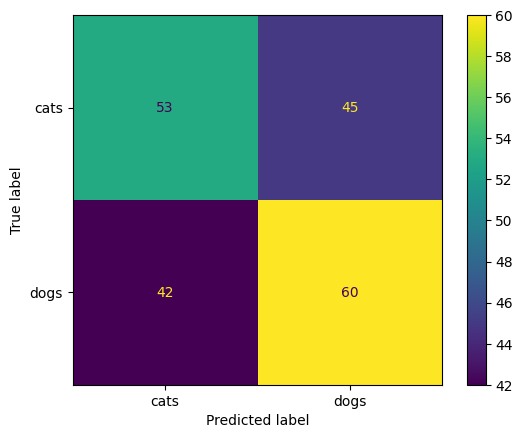

In [32]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = categories).plot()
plt.show()
# from sklearn.model_selection import KFold, cross_val_score
# scores = cross_val_score(model,flat_image_data,target_index,cv= 5)
# print(f"Cross_Validation accuracy: {(scores.mean() * 100): .2f}%")